In [58]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_maze(graph, path_r, path_l, colors, n):
    path_l = list(map(int, path_l))
    path_r = list(map(int, path_r))
    
    # Create a graph object
    G = nx.Graph()  # Still using undirected graph for the static edges
    
    # Define a color mapping for the edges
    color_mapping = {'R': 'red', 'G': 'green', 'Y': 'yellow', 'B': 'blue'}
    
    # Add nodes and edges to the graph
    for node, edges in graph.items():
        G.add_node(node)  # Add the node to the graph
        for edge, color in edges:
            G.add_edge(node, edge, color=color_mapping[color])
    
    # Define positions for each node
    pos = nx.spring_layout(G, seed=42)

    # Draw the graph nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightgrey', node_size=500)
    
    # Draw the graph edges
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
    
    # Draw the labels
    nx.draw_networkx_labels(G, pos)
    
    # Create a directed graph for the path arrows
    DG = nx.DiGraph()
    
    # Draw the paths with arrows if they exist
    if path_r:  # Check if path_r is not empty
        path_edges_r = [(path_r[i], path_r[i+1]) for i in range(len(path_r) - 1)]
        DG.add_edges_from(path_edges_r)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges_r, edge_color='red', width=4, alpha=0.7, arrows=True, arrowsize=20)
    
    if path_l:  # Check if path_l is not empty
        path_edges_l = [(path_l[i], path_l[i+1]) for i in range(len(path_l) - 1)]
        DG.add_edges_from(path_edges_l)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges_l, edge_color='blue', width=4, alpha=0.7, arrows=True, arrowsize=20)
    
    # Highlight the maze exit differently
    nx.draw_networkx_nodes(G, pos, nodelist=[n], node_color='green', node_size=700)
    
    plt.title('Maze Visualization with Paths')
    plt.axis('off')  # Hide the axis for a cleaner look
    plt.show()

# Ensure to call this function with the correct arguments in your main code

R 1 // Rocket goes to A
L 2 // Lucky goes to B
R 5 // Rocket goes to E
L 3 // Lucky goes to C
R 9 // Rocket goes to I
L 13 // Lucky goes to M
R 14 // Rocket goes to N
L 23 // Lucky goes to W
R 20 // Rocket goes to T
L 27 // Lucky goes to [
R 24 // Rocket goes to X
L 26 // Lucky goes to Z
R 28 // Rocket goes to \
L 28 // Lucky goes to \


C:\Users\Asus\AppData\Local\Temp\ipykernel_2308\3162187451.py:28: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)


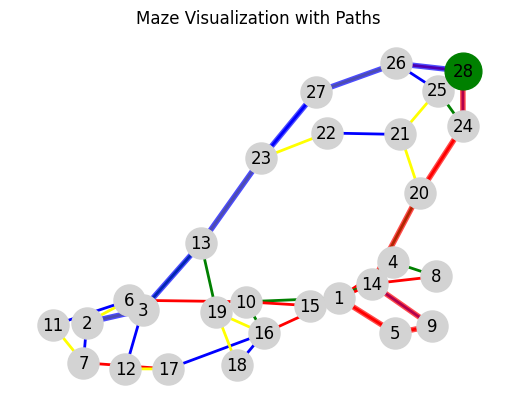

In [59]:
### Python Code to Solve the Maze Problem Using BFS ###

from collections import defaultdict, deque

# Define a function to parse the maze file
def parse_maze(input_file):
    with open(input_file, 'r') as file:
        n, m = map(int, file.readline().split())
        colors = file.readline().split()
        
        s1, s2 = map(int, file.readline().split())
        graph = defaultdict(list)
        
        for _ in range(m):
            a, b, c = file.readline().split()
            a, b = int(a), int(b)
            graph[a].append((b, c))
            graph[b].append((a, c))  # Because this is an undirected graph
            
    return n, colors, s1, s2, graph

# Implement the BFS algorithm to find the path
def bfs(graph, start, goal):
    visited = set()
    queue = deque([(start, [str(start)])])  # queue holds tuples of (vertex, path)

    while queue:
        vertex, path = queue.popleft()
        visited.add(vertex)
        
        for neighbor, color in graph[vertex]:
            if neighbor == goal:
                return path + [str(neighbor)]
            elif neighbor not in visited:
                queue.append((neighbor, path + [str(neighbor)]))
                visited.add(neighbor)
    return None  # No path found


# Printing the path in the specified format
def print_path(path_r, path_l, colors):
    path_length = max(len(path_r), len(path_l))
    for i in range(path_length):
        if i < len(path_r):
            print(f"R {path_r[i]} // Rocket goes to {chr(64 + int(path_r[i]))}")
        if i < len(path_l):
            print(f"L {path_l[i]} // Lucky goes to {chr(64 + int(path_l[i]))}")


# Main code to read maze and find path
def solve_maze(input_file):
    n, colors, s1, s2, graph = parse_maze(input_file)
    goal_vertex = n  # Assuming the goal is the last vertex

    # Find path for Rocket (R) and Lucky (L)
    path_r = bfs(graph, s1, goal_vertex)
    path_l = bfs(graph, s2, goal_vertex)

    # Adjusting the output to interleave R and L's moves
    print_path(path_r, path_l, colors)
    visualize_maze(graph, path_r, path_l, colors, n)

# Replace 'maze_input.txt' with the actual path to the input file
solve_maze('input.txt')